## Гипотезы

In [1]:
import scipy.stats as sts
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.stats.proportion import proportions_ztest

alpha = 0.05 # уровень значимости для всех гипотез

In [4]:
df = pd.read_csv('df_for_ML_upd.txt')
df 

,Цена,Год,Километраж,Количество дверей,Количество мест,Длина,Ширина,Высота,Максимальная скорость,Разгон до 100,...,Тип привода_задний,Тип привода_передний,Тип привода_полный,Тип двигателя_Электро,Тип двигателя_бензиновый,Тип двигателя_гибридный,Тип двигателя_дизельный,Объём,Удельная мощность автомобиля,Плотность пассажирского пространства
0,3440000.0,2023.0,1000.0,5.0,5.0,4865.0,1948.0,1695.0,200.0,5.411007,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,16.063549,14.069120,0.311264
1,4060000.0,2023.0,1000.0,5.0,5.0,4770.0,1895.0,1689.0,215.0,7.700000,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,15.267124,15.589052,0.327501
2,3730000.0,2023.0,1000.0,5.0,5.0,4865.0,1948.0,1695.0,200.0,5.411007,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,16.063549,14.069120,0.311264
3,4190000.0,2023.0,1000.0,5.0,5.0,4775.0,1920.0,1671.0,200.0,7.600000,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,15.319728,16.253552,0.326377
4,1650000.0,2020.0,36000.0,5.0,5.0,4318.0,1831.0,1662.0,174.0,14.000000,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,13.140201,9.284485,0.380512
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2041,2320000.0,2022.0,30000.0,5.0,5.0,4620.0,1890.0,1780.0,195.0,10.178484,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,15.542604,13.575589,0.321696
2042,1580000.0,2021.0,17000.0,5.0,5.0,4350.0,1810.0,1615.0,195.0,7.900000,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,12.715703,13.919797,0.393215
2043,1430000.0,2021.0,41000.0,5.0,5.0,4437.0,1850.0,1625.0,190.0,10.178484,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,13.338731,12.669871,0.374848
2044,1490000.0,2021.0,16000.0,5.0,5.0,4350.0,1810.0,1615.0,195.0,7.900000,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,12.715703,13.919797,0.393215


### Гипотеза №1
Первая гипотеза звучит так: *правда ли, что за Уралом (Екатеринбург, Новосибирск, Владивосток) машины стоят дешевле чем в западной части России (Москва, Санкт-Петербург, Ростов-на-Дону)?*

Сначала убедимся, что для нашей выборки это так:

In [5]:
prices_Ural = df[(df['Город_ekaterinburg'] == 1) | (df['Город_novosibirsk'] == 1)
                | (df['Город_vladivostok'] == 1)]['Цена'] #цены за Уралом

prices_not_Ural = df[(df['Город_moskva'] == 1) | (df['Город_sankt-peterburg'] == 1) |
                    (df['Город_rostov-na-donu'] == 1)]['Цена'] #цены в западной части

In [6]:
mean_Ural = prices_Ural.mean()
mean_not_Ural = prices_not_Ural.mean()

print(f'Средняя цена на машины за Уралом: {mean_Ural}')
print(f'Средняя цена на машины в западной части: {mean_not_Ural}')

Средняя цена на машины за Уралом: 2382678.7416587225
Средняя цена на машины в западной части: 2474222.668004012


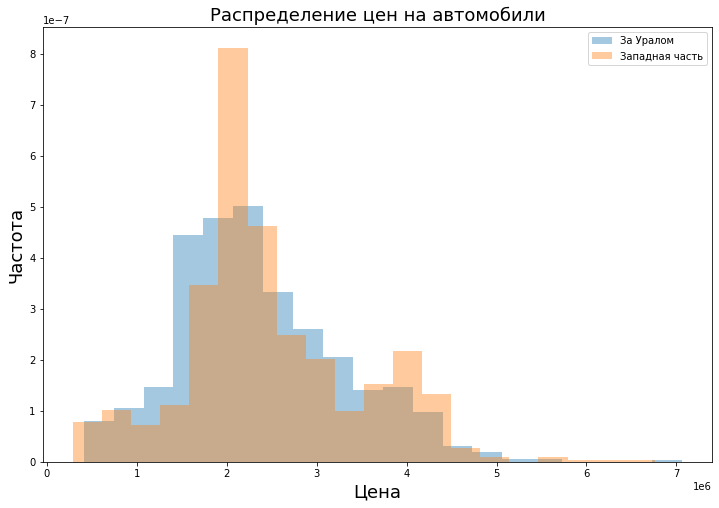

In [7]:
x = prices_Ural
y = prices_not_Ural

plt.figure(figsize=(12,8))
plt.hist(x, bins=20, density=True, alpha=0.4, label='За Уралом')
plt.hist(y, bins=20, density=True, alpha=0.4, label='Западная часть')
plt.title('Распределение цен на автомобили', fontsize = 18)
plt.xlabel('Цена', fontsize = 18)
plt.ylabel('Частота', fontsize = 18)
plt.legend();

Еще из визуализаций мы поняли, что распределение цен на автомобили не похоже на нормальное, поэтому будем ориентироваться на u-test Манна-Уитни, но также посмотрим на t-тест

Нулевая гипотеза будет предполагать, что статистически-значимой разницы между ценами в двух разных регионах нет, а альтернативная, что цены за Уралом более низкие:

$$
\begin{aligned}
&H_0: \hspace{2mm} \mu_{Ural} - \mu_{not Ural} = 0\hspace{2mm}  \\
&H_1: \hspace{2mm} \mu_{part} - \mu_{not Ural} < 0\hspace{2mm} 
\end{aligned}
$$

In [8]:
u_test = sts.mannwhitneyu(prices_Ural, prices_not_Ural, alternative = 'less')
t_test = sts.ttest_ind(prices_Ural, prices_not_Ural, equal_var = False, alternative = 'less')
    
if u_test[1] < alpha:
    print('Для теста Манна-Уитни нулевая гипотеза отвергается')
else:
    print('Для теста Манна-Уитни нулевая гипотеза не отвергается')
    
if t_test[1] < alpha:
    print('Для t-теста нулевая гипотеза отвергается')
else:
    print('Для t-теста нулевая гипотеза не отвергается')

Для теста Манна-Уитни нулевая гипотеза отвергается
Для t-теста нулевая гипотеза отвергается


Оба теста отвергли нулевую гипотезу, значит на уровне значимости 0.05 мы можем сказать, что в среднем за Уралом покупать машины дешевле, наше предположение подтвердилось

### Гипотеза №2
Вторая гипотеза будет проверять то, что обычно можно наблюдать в жизни: *правда ли, что полноприводные автомобили разгоняются до 100 км/ч быстрее чем переднеприводные?*

Опять же, убедимся, что для нашей выборки это так:

In [9]:
front = df[df['Тип привода_передний'] == 1]['Разгон до 100']
full = df[df['Тип привода_полный'] == 1]['Разгон до 100']

front_mean = df[df['Тип привода_передний'] == 1]['Разгон до 100'].mean()
full_mean = df[df['Тип привода_полный'] == 1]['Разгон до 100'].mean()

print(f'Средний разгон до 100 для переднеприводных машин: {front_mean}')
print(f'Средний разгон до 100 для полноприводных машин: {full_mean}')

Средний разгон до 100 для переднеприводных машин: 10.091712660200916
Средний разгон до 100 для полноприводных машин: 8.780939325005212


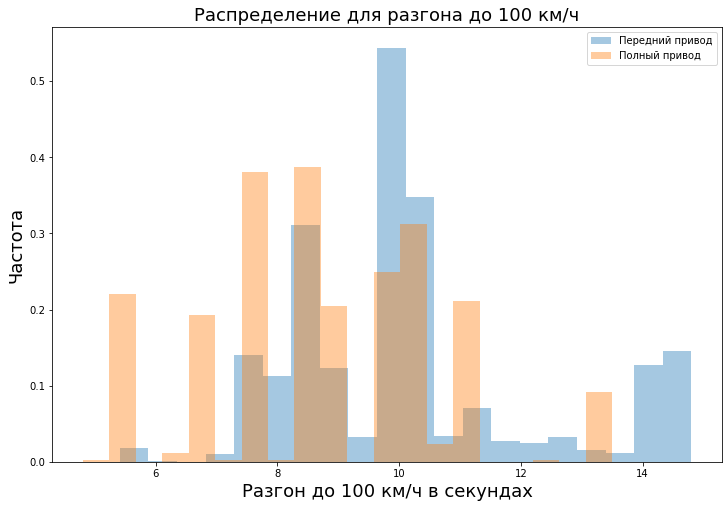

In [10]:
x = front
y = full

plt.figure(figsize=(12,8))
plt.hist(x, bins=20, density=True, alpha=0.4, label='Передний привод')
plt.hist(y, bins=20, density=True, alpha=0.4, label='Полный привод')
plt.title('Распределение для разгона до 100 км/ч', fontsize = 18)
plt.xlabel('Разгон до 100 км/ч в секундах', fontsize = 18)
plt.ylabel('Частота', fontsize = 18)
plt.legend();

Если посмотрим на распределения, то опять можно увидеть, что они не похожи на нормальные, поэтому снова используем u-test

Формулируем нулевую и альтернативную гипотезы:

$$
\begin{aligned}
&H_0: \hspace{2mm} \mu_{front} - \mu_{full} = 0\hspace{2mm}  \\
&H_1: \hspace{2mm} \mu_{front} - \mu_{full} >0\hspace{2mm} 
\end{aligned}
$$

In [11]:
u_test_1 = sts.mannwhitneyu(front, full, alternative = 'greater')
t_test_1 = sts.ttest_ind(front, full, equal_var = False, alternative = 'greater')
    
if u_test_1[1] < alpha:
    print('Для теста Манна-Уитни нулевая гипотеза отвергается')
else:
    print('Для теста Манна-Уитни нулевая гипотеза не отвергается')
    
if t_test_1[1] < alpha:
    print('Для t-теста нулевая гипотеза отвергается')
else:
    print('Для t-теста нулевая гипотеза не отвергается')

Для теста Манна-Уитни нулевая гипотеза отвергается
Для t-теста нулевая гипотеза отвергается


Нулевая гипотеза снова отвергнута, поэтому мы можем сказать, что в среднем машины с полным приводом разгоняются до 100 км/ч быстрее чем переднеприводные

### Гипотеза №3

Третья гипотеза: *Правда ли, что доля машин с коробкой автомат в 2021 и 2023 году была примерно одинаковой?* 

Для проверки гипотезы о равенстве долей будем использовать z-test. Формулируем гипотезы:

$$
\begin{aligned}
&H_0: \hspace{2mm} p_{2023} - p_{2021} = 0\hspace{2mm}  \\
&H_1: \hspace{2mm} p_{2023} - p_{2021} \neq 0\hspace{2mm} 
\end{aligned}
$$

In [12]:
count_1 = (df[df['Год'] == 2023]['Коробка передач_Автомат'] == 1).sum()
count_2 = (df[df['Год'] == 2021]['Коробка передач_Автомат'] == 1).sum()
nobs_1 = len(df[df['Год'] == 2023])
nobs_2 = len(df[df['Год'] == 2021])

count = np.array([count_1, count_2])
nobs = np.array([nobs_1, nobs_2])
test = proportions_ztest(count, nobs)

if test[1] < alpha:
    print('Гипотеза отвергается')
else:
    print('Гипотеза не отвергается')


Гипотеза отвергается


Гипотеза была отвергнута. Получается, что между долями машин с автоматической коробкой в 2023 и 2021 году есть статистически значимая разница

### Гипотеза №4

Четвертая гипотеза: *Существует ли значимая взаимосвязь между типом двигателя и классом автомобиля?*

Проверить гипотезу можно при помощи критерия независимости хи-квадрат:

$$
\begin{aligned}
&H_0: \text{Не существует зависимости между типом двигателя и классом машины}  \\
&H_1: \text{Между классом машины и типом двигателя есть взаимосвязь} \
\end{aligned}
$$


In [13]:
classes = ['Класс автомобиля_B', 'Класс автомобиля_C', 'Класс автомобиля_D',
       'Класс автомобиля_E', 'Класс автомобиля_F', 'Класс автомобиля_J',
       'Класс автомобиля_M']
engines = ['Тип привода_полный', 'Тип двигателя_Электро',
       'Тип двигателя_бензиновый', 'Тип двигателя_гибридный',
       'Тип двигателя_дизельный']

A = np.zeros((len(engines), len(classes)))

In [14]:
for i in range(len(engines)):
    for j in range(len(classes)):
        A[i, j] = len(df[(df[engines[i]] == 1) & (df[classes[j]] == 1)])
test_chi = sts.chi2_contingency(A)

if test_chi[1] < alpha:
    print('Нулевая гипотеза отвергается')
else:
    print('Нулевая гипотеза не отвергается')

Нулевая гипотеза отвергается


Нулевая гипотеза отвергается, значит на уровне значимости 0.05 мы можем сказать, что класс машины и тип двигателя взаимосвязаны